# Use this for small tests

In [1]:
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def l2n(x):
    return np.array(x)

In [74]:
expSumFileName = 'transportExpSum20230306bots21_.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)

In [76]:
expNum = 36
row = expSum.iloc[expNum]

In [80]:
df = pd.read_csv(row.linkingFileName)


In [92]:
dfF

,frame,frame.1,x,y,r,particle
0,1,1,653.5,554.5,118.2,0
1,2,2,653.5,554.5,118.2,0
2,3,3,653.5,552.5,118.2,0
3,4,4,654.5,553.5,117.1,0
4,5,5,654.5,553.5,117.1,0
...,...,...,...,...,...,...
32914,32972,32972,636.5,475.5,117.1,3
32915,32973,32973,636.5,470.5,119.3,3
32916,32974,32974,657.5,471.5,119.3,3
32917,32975,32975,658.5,471.5,119.3,3


In [96]:
dfF.particle==0

0         True
1         True
2         True
3         True
4         True
         ...  
32914    False
32915    False
32916    False
32917    False
32918    False
Name: particle, Length: 32919, dtype: bool

In [103]:
cond = (11E3<df.frame) &(df.frame<13E3)
dfF = df.copy()

cond = ~((dfF.particle==0)&(dfF.frame>12100))
dfF = dfF[cond]
dfF.particle = 0

In [107]:
newFileName = 'D:\\Eden\\3_1_23\\aligners_21_32cm\\C0550.MP4_locatedFull20230303a.csv_linked.csv'
dfF.to_csv(newFileName)

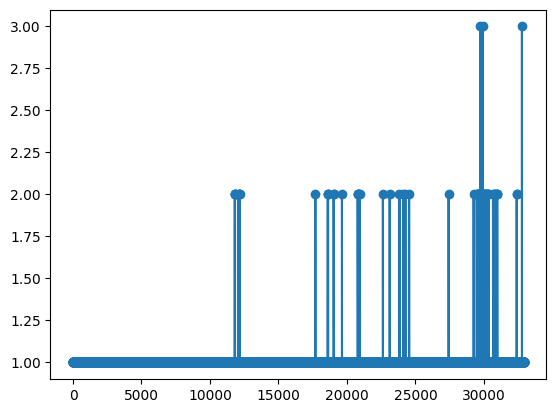

In [105]:
plt.plot(dfF.frame.diff(1),'-o')

In [ ]:
plt

In [50]:
row = expSum.iloc[14]
fileNameLocating = row.locatingFileName

In [51]:
df = pd.read_csv(fileNameLocating)

In [52]:
search_range= 250
memory= 500
minTrajLength =5000
dfr = df[df.frame<5000]

t = tp.link(df,search_range=search_range,memory=memory)
#t1 =tp.filter_stubs(t,threshold=minTrajLength)           

Frame 34440: 1 trajectories present.


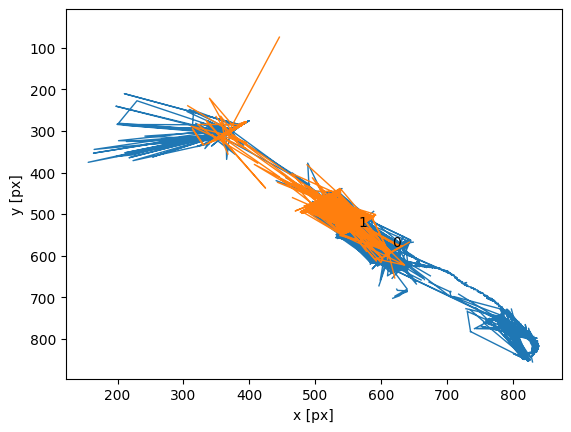

In [63]:
t1 = tp.filter_stubs(t,2000)
cond = (t1.particle == 1) | (t1.particle ==0)
tp.plot_traj(t1[cond],label=True)

#tp.plot_traj(t1,label=True)

In [71]:
t1c.particle.unique()

array([0], dtype=int64)

C:\Users\User\AppData\Local\Temp\ipykernel_94688\4034041111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1c.particle=[0]*len(t1c)


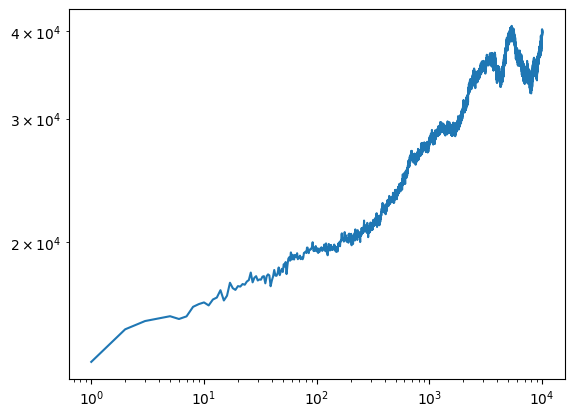

In [72]:
t1c = t1[cond]
t1c.particle=[0]*len(t1c)
imsd = tp.imsd(t1c,1,1,max_lagtime=10000)
plt.loglog(imsd)

In [42]:
print(imsrow.linkingFileName)

D:\Eden\27_12_22\aligners-12cm\C0532.MP4_locatedFull20230223a_test_eden.csv_linked.csv


In [43]:
t1[t1.particle==0].to_csv(row.linkingFileName)
#len(t1[t1.particle==0])

In [40]:
10000/25

400.0

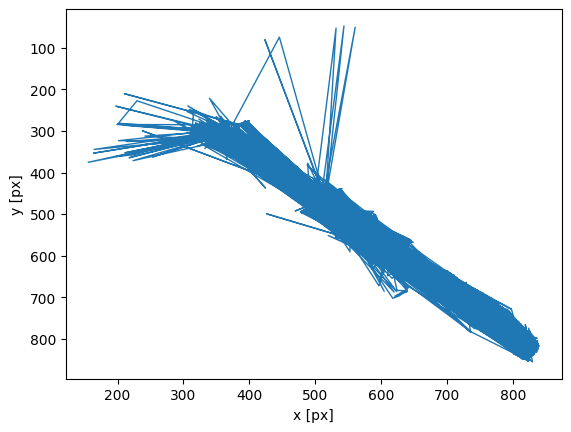

<AxesSubplot: xlabel='x [px]', ylabel='y [px]'>

In [73]:
tp.plot_traj(t1c)